In [1]:
from lib import *
import pandas as pd
import matplotlib.pyplot as plt

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


#dfs = load_data_bq()
dfs = load_data_db()
df = dfs["contract_days_removals"]
#55s

Conexão estabelecida com sucesso!


In [2]:
df["contract_created_at"] = pd.to_datetime(df["contract_created_at"])
df["contract_end_at"] = pd.to_datetime(df["contract_end_at"])
df["fed_created_at"] = pd.to_datetime(df["fed_created_at"])
df = df.sort_values("fed_created_at", ascending=False)
df["days"] = df["days"].astype(float)
df["action"] = df["action"].astype(str)
df["before"] = df["fed_created_at"] > df["contract_end_at"]
df["remove"] = df["action"] == "remove"
df["remove_before"] = df["remove"] & df["before"]
df_analise = df.copy()

before
True     14951
False    87311
Name: count, dtype: int64


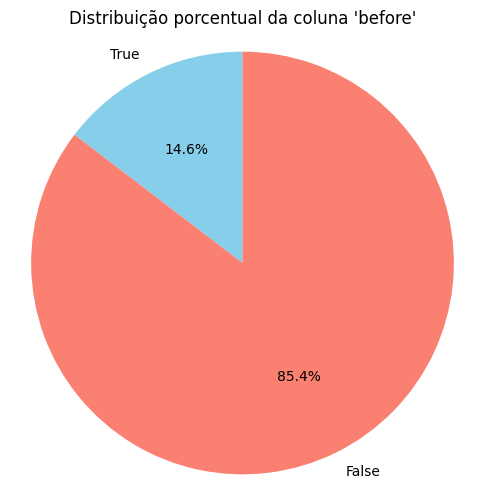

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Conta os valores True e False na coluna 'before'
contagem = df["before"].value_counts()
contagem = contagem.sort_index(ascending=False)
print(contagem)

# Gera o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["skyblue", "salmon"])
plt.title("Distribuição porcentual da coluna 'before'")
plt.axis('equal')  # Garante que o gráfico seja circular
plt.show()


remove
True     20163
False    82099
Name: count, dtype: int64


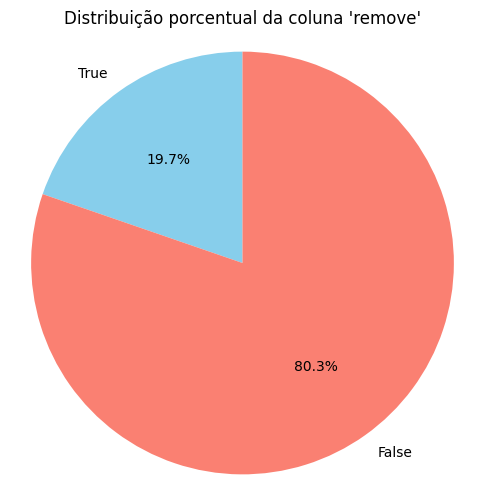

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Conta os valores True e False na coluna 'before'
contagem = df["remove"].value_counts()
contagem = contagem.sort_index(ascending=False)
print(contagem)

# Gera o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["skyblue", "salmon"])
plt.title("Distribuição porcentual da coluna 'remove'")
plt.axis('equal')  # Garante que o gráfico seja circular
plt.show()


remove_before
True      7935
False    94327
Name: count, dtype: int64


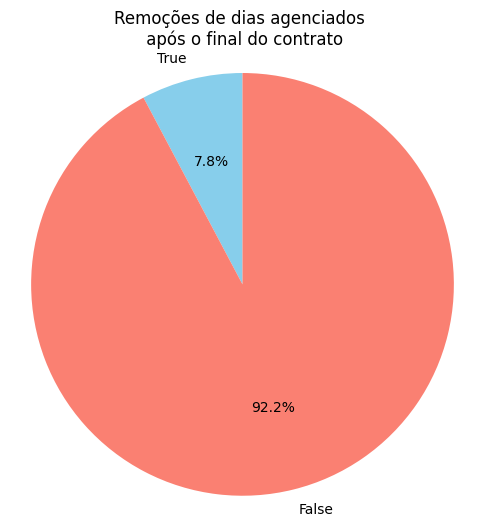

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_analise.copy()

# Conta os valores True e False na coluna 'before'
contagem = df["remove_before"].value_counts()
contagem = contagem.sort_index(ascending=False)
print(contagem)

# Gera o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["skyblue", "salmon"])
plt.title("Remoções de dias agenciados \n após o final do contrato")
plt.axis('equal')  # Garante que o gráfico seja circular
plt.show()


In [6]:
df[df['remove_before']].groupby("days").count().head()

,contract_created_at,contract_end_at,fed_created_at,days_to_contract_end,action,before,remove,remove_before
days,,,,,,,,
-5.0,3,3,3,3,3,3,3,3
-0.5,1,1,1,1,1,1,1,1
0.0,124,124,124,124,124,124,124,124
0.5,472,472,472,472,472,472,472,472
1.0,2061,2061,2061,2061,2061,2061,2061,2061


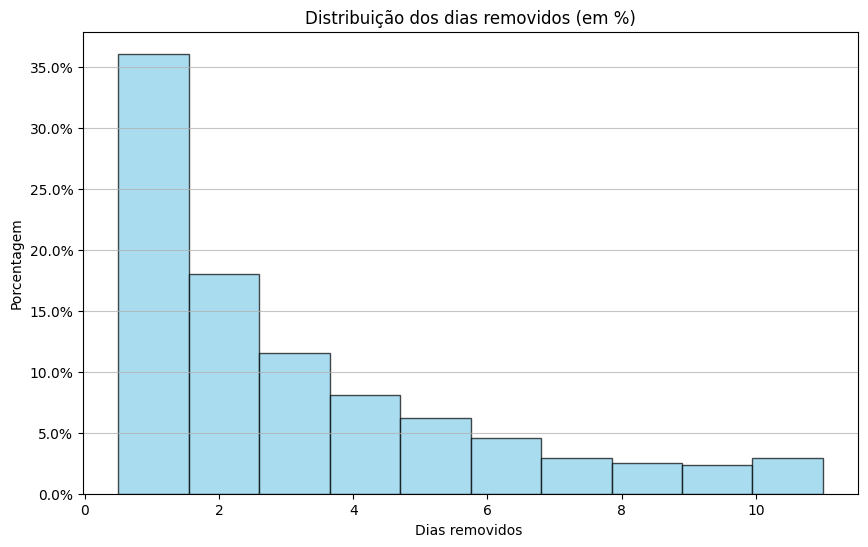

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df = df_analise.copy()
df = df[df['remove_before']]
# Cálculo do IQR
Q1 = df['days'].quantile(0.25)
Q3 = df['days'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para remoção dos outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers
df_clean = df[(df['days'] >= lower_bound) & (df['days'] <= upper_bound) & (df['days'] > 0)]

plt.figure(figsize=(10, 6))
# Plot do histograma com 30 bins, densidade para que a soma das áreas seja 1
counts, bins, patches = plt.hist(df_clean["days"], density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Configurar o eixo y para exibir porcentagens
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel("Dias removidos ")
plt.ylabel("Porcentagem")
plt.title("Distribuição dos dias removidos (em %)")
plt.grid(axis='y', alpha=0.75)
plt.show()
